In [87]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [88]:
import pandas as pd

documents = pd.read_csv("/content/sample_data/spam.csv") #https://github.com/SmallLion/Python-Projects/blob/main/Spam-detection/spam.csv
print(documents.columns)
x = documents.iloc[:,1:2]
y = documents.iloc[:,0:1]
IsSpam = {'spam': 1,'ham': 0}
y['v1'] = y['v1'].map(IsSpam)

# x = x['v2'].tolist()
# y = y['v1'].tolist()
print(x)
print(y)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
                                                     v2
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
...                                                 ...
5567  This is the 2nd time we have tried 2 contact u...
5568              Will Ì_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name

[5572 rows x 1 columns]
      v1
0      0
1      0
2      1
3      0
4      0
...   ..
5567   1
5568   0
5569   0
5570   0
5571   0

[5572 rows x 1 columns]


<ipython-input-88-9bd92fa18d09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['v1'] = y['v1'].map(IsSpam)


In [90]:
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

x = x.apply(lambda row: remove_stop_words(row['v2']), axis=1)
print(x)
print(y)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Length: 5572, dtype: object
      v1
0      0
1      0
2      1
3      0
4      0
...   ..
5567   1
5568   0
5569   0
5570   0
5571   0

[5572 rows x 1 columns]


In [91]:
max_words = 2000
max_length = 500
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen= max_length)
print(x.shape)

(5572, 500)


In [73]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
 
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2048128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,112,257
Trainable params: 2,112,257
Non-trainable params: 0
_________________________________________________________________


In [74]:
import numpy as np
x = np.array(x)
y = np.array(y)
print(x)
print(y)
hist = model.fit(x, y, validation_split=0.2, epochs=10, batch_size=10)

[[   0    0    0 ... 1059   11   59]
 [   0    0    0 ...  322    1 1586]
 [   0    0    0 ...  367   56  271]
 ...
 [   0    0    0 ...    0    0 1056]
 [   0    0    0 ...  807  115    8]
 [   0    0    0 ...    0  347  160]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]
Epoch 1/10
446/446 [==============================] - 14s 30ms/step - loss: 0.1922 - accuracy: 0.9287 - val_loss: 0.1132 - val_accuracy: 0.9641
Epoch 2/10
446/446 [==============================] - 13s 30ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0704 - val_accuracy: 0.9785
Epoch 3/10
446/446 [==============================] - 13s 30ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.0943 - val_accuracy: 0.9821
Epoch 4/10
446/446 [==============================] - 13s 30ms/step - loss: 0.0119 - accuracy: 0.9978 - val_loss: 0.1012 - val_accuracy: 0.9794
Epoch 5/10
446/446 [==============================] - 13s 29ms/step - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.0963 - val_accuracy: 0.9767
Epoch 6/10
446/4

[]

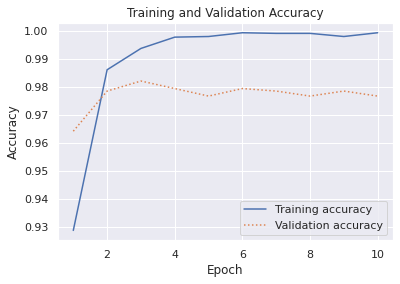

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [202]:
#Find out which input model got wrong:
prediction = np.round(model.predict(x))

175/175 [==============================] - 2s 9ms/step


In [203]:
y_list = y.values.tolist()
wrong_answer = []
wrong_answer_full_text = []
for i in range(0,len(prediction)):
  if prediction[i] != y_list[i]:
    wrong_answer_full_text.append((x[i]))
    wrong_answer.append((prediction[i][0]))

In [204]:
print(np.shape(wrong_answer_full_text))

(29, 500)


In [205]:
print(tokenizer.sequences_to_texts(wrong_answer_full_text))
print(wrong_answer)

['', '', 'text', 'welcome msg free giving free calling future daily cancel send', 'want sex ring costs', 'money number wot next', 'hot fat thanks especially text word', 'xmas reward waiting computer picked mobile receive reward call', 'liked new mobile', 'get lots cash weekend dear welcome weekend got biggest best ever cash give away', 'check choose babe', 'nokia phone', 'v simple pass give mins', 'hi sending free phone number couple days give access adult', 'support texting added next bill', 'u txt u remember want talk u txt', 'sorry missed call please call back', 'themob hit link get game new crazy free', 'private account statement', 'xmas reward waiting computer picked mobile receive reward call', 'dating two started sent text talk sport radio last week connection think', 'current bid auction send customer care', 'guaranteed award maybe even cash claim ur award call free number wat u think', 'latest news police station nothing go', 'shopping per person call visit', 'c', 'luck win bi

In [206]:
#Test new input
cleaned_text = remove_stop_words('Can you attend a code attend on Tuesday? Need to make sure the logic is rock solid.')
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
prediction = model.predict(padded_sequence)
pretty_print = lambda x: np.format_float_positional(x, trim="-")
print(np.round(prediction[0][0]))

1/1 [==============================] - 0s 37ms/step
0.0


In [207]:
cleaned_text = remove_stop_words(' rate apply')
print(cleaned_text)
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
prediction = model.predict(padded_sequence)
pretty_print = lambda x: np.format_float_positional(x, trim="-")
print(np.round(prediction[0][0]))

rate apply
1/1 [==============================] - 0s 25ms/step
1.0
